In [1]:
import numpy as np
import pandas as pd
import sympy as sm

from matplotlib import pyplot as plt

In [2]:
sm.__version__

'1.10.1'

Выходной сигнал коррелятора спектрометра DLS-82E определяется выражением:
\begin{equation}
    \label{eq:eq1}
    S\left(\tau,C_A,F_0, t_1\right) = C_A K_{BS} K_{LS} \phi\left(\tau,F_0,t_1\right),
\end{equation}
где  
$C_A$ - амплитуда емкостного релаксационного сигнала,  
$K_{BS}$ - масштабный коэффициент, зависящий от чувствительности емкостного моста,  
$K_{LS}$ - масштабный коэффициент селектора,  
$\tau$ - постоянная времени релаксации гулбокого уровня,  
$F_0$ - частота сканирования импульсов заполнения,  
$t_1$ - длительность импульса заполнения,  
$\phi\left(\tau,F_0,t_1\right)$ - функция определяемая выражением:  
\begin{equation}
    \label{eq:eq2}
    \phi\left(\tau,F_0,t_1\right) = 
    M \tau F_0 e^{-\frac{0.05}{\tau F_0}}
    \left(1-e^{\frac{t_1 F_0-0.45}{\tau F_0}}
    -e^{-\frac{0.5}{\tau F_0}}+
    e^{\frac{t_1 F_0-0.95}{\tau F_0}}\right),
\end{equation}
где $M$ -- масштабный множитель.

таким образом,
\begin{equation}
    \label{eq:eq2}
    M = \frac{1}{\max{\left[
    \tau F_0 e^{-\frac{0.05}{\tau F_0}}
    \left(1-e^{\frac{t_1 F_0-0.45}{\tau F_0}}
    -e^{-\frac{0.5}{\tau F_0}}+
    e^{\frac{t_1 F_0-0.95}{\tau F_0}}\right)
    \right]}}
\end{equation}

In [3]:
tau = sm.symbols('tau', positive=True, constant=True)
tau

tau

In [4]:
F0 = sm.symbols('F0', positive=True, constant=False)
F0

F0

In [5]:
t1 = sm.symbols('t1', positive=True, constant=True)
t1

t1

In [6]:
# M = sm.symbols('M', positive=True)
# M

In [7]:
exp0 = sm.exp( -0.05 / (tau * F0) )
exp0

exp(-0.05/(F0*tau))

In [8]:
exp1 = - sm.exp( (t1 * F0 - 0.45) / (tau * F0) )
exp1

-exp((F0*t1 - 0.45)/(F0*tau))

In [9]:
exp2 = - sm.exp( (-0.5) / (tau * F0) )
exp2

-exp(-0.5/(F0*tau))

In [10]:
exp3 = sm.exp( (t1 * F0 - 0.95) / (tau * F0) )
exp3

exp((F0*t1 - 0.95)/(F0*tau))

In [11]:
phi = tau * F0 * exp0 * (1 + exp1 + exp2 + exp3) # * M

phi

F0*tau*(exp((F0*t1 - 0.95)/(F0*tau)) - exp((F0*t1 - 0.45)/(F0*tau)) + 1 - exp(-0.5/(F0*tau)))*exp(-0.05/(F0*tau))

In [12]:
dphi_dF0 = sm.diff(phi, F0)
dphi_dF0

F0*tau*((t1/(F0*tau) - (F0*t1 - 0.95)/(F0**2*tau))*exp((F0*t1 - 0.95)/(F0*tau)) - (t1/(F0*tau) - (F0*t1 - 0.45)/(F0**2*tau))*exp((F0*t1 - 0.45)/(F0*tau)) - 0.5*exp(-0.5/(F0*tau))/(F0**2*tau))*exp(-0.05/(F0*tau)) + tau*(exp((F0*t1 - 0.95)/(F0*tau)) - exp((F0*t1 - 0.45)/(F0*tau)) + 1 - exp(-0.5/(F0*tau)))*exp(-0.05/(F0*tau)) + 0.05*(exp((F0*t1 - 0.95)/(F0*tau)) - exp((F0*t1 - 0.45)/(F0*tau)) + 1 - exp(-0.5/(F0*tau)))*exp(-0.05/(F0*tau))/F0

In [13]:
# dphi_dF0 = dphi_dF0.subs(t1, 20*10**-6)
# dphi_dF0

In [14]:
# dphi_dF0 = dphi_dF0.subs(tau, 10**-3)
# dphi_dF0

In [15]:
dphi_dF0.simplify()

(-1.0*F0*tau*exp(0.45/(F0*tau)) + 1.0*F0*tau*exp(0.95/(F0*tau)) + 1.0*F0*tau*exp(t1/tau) - 1.0*F0*tau*exp((t1 + 0.5/F0)/tau) - 0.55*exp(0.45/(F0*tau)) + 0.05*exp(0.95/(F0*tau)) + 1.0*exp(t1/tau) - 0.5*exp((t1 + 0.5/F0)/tau))*exp(-1.0/(F0*tau))/F0

In [16]:
sm.solveset(dphi_dF0, F0, domain=sm.Interval(1,2500))

Complement(ConditionSet(_R, Eq(-_R*tau*exp(0.05/(_R*tau)) + _R*tau*exp(0.55/(_R*tau))*exp((_R*t1 - 0.95)/(_R*tau)) - _R*tau*exp(0.55/(_R*tau))*exp((_R*t1 - 0.45)/(_R*tau)) + _R*tau*exp(0.55/(_R*tau)) - 0.55*exp(0.05/(_R*tau)) + 1.0*exp(0.55/(_R*tau))*exp((_R*t1 - 0.95)/(_R*tau)) - 0.5*exp(0.55/(_R*tau))*exp((_R*t1 - 0.45)/(_R*tau)) + 0.05*exp(0.55/(_R*tau)), 0), Interval(1, 2500)), ConditionSet(_R, Eq(_R*exp(0.6/(_R*tau)), 0), Interval(1, 2500)))

In [17]:
dphi_dF0 = dphi_dF0.subs(tau, 0.001)
dphi_dF0 = dphi_dF0.subs(t1, 20*10**-6)

dphi_dF0 = dphi_dF0.simplify()

dphi_dF0

1.0*(-0.001*F0*exp(450.0/F0) - 0.00102020134002676*F0*exp(500.0/F0) + 0.001*F0*exp(950.0/F0) + 0.00102020134002676*F0 - 0.55*exp(450.0/F0) - 0.510100670013378*exp(500.0/F0) + 0.05*exp(950.0/F0) + 1.02020134002676)*exp(-1000.0/F0)/F0

In [18]:
from sympy.plotting import plot

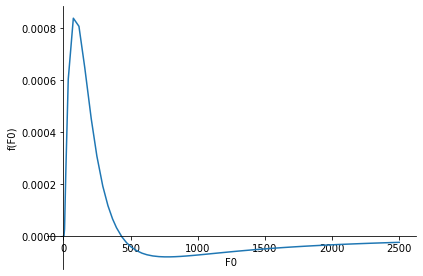

In [19]:
p = plot(dphi_dF0, (F0, 1, 2500))

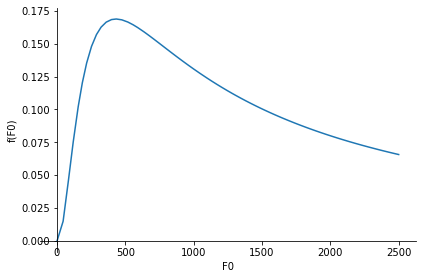

In [20]:
phi = phi.subs(tau, 0.001)
phi = phi.subs(t1, 20*10**-6)

p1 = plot(phi, (F0, 1, 2500))

In [26]:
sm.solveset(dphi_dF0, domain=sm.Interval(1,2500))

Complement(ConditionSet(_R, Eq(0.00102020134002676*_R*exp(1100.0/_R) - 0.001*_R*exp(1550.0/_R) - 0.00102020134002676*_R*exp(1600.0/_R) + 0.001*_R*exp(2050.0/_R) + 1.02020134002676*exp(1100.0/_R) - 0.55*exp(1550.0/_R) - 0.510100670013378*exp(1600.0/_R) + 0.05*exp(2050.0/_R), 0), Interval(1, 2500)), ConditionSet(_R, Eq(_R*exp(2100.0/_R), 0), Interval(1, 2500)))

In [27]:
solution = F0*sm.exp(0.6/(F0*tau))
solution

F0*exp(0.6/(F0*tau))